<a href="https://colab.research.google.com/github/arianneghislainerull/COOLlection.py/blob/master/(LSTM)StockPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Cite the author 

####Arianne Ghislaine Rull is contributing to the project by explaining the source code.

####This Colab notebook's source code is taken from the following links. All credits to the owner.

Medium Article -> https://medium.com/@randerson112358/stock-price-prediction-using-python-machine-learning-e82a039ac2bb
YouTube Video -> https://www.youtube.com/watch?v=QIUxPv5PJOY&feature=emb_title

In [ ]:
# Description: This program uses an artificial recurrent neural network called Long Short Term Memory (LSTM) to predict 
# the closing stock price of a corporation (Apple Inc.) using the past 60 day stock price.

In [4]:
# First and foremost, this block of code is used to import or 
# load the essential libraries that would be
# would be used in this particular project. 

import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt

# This code is for the use of style
plt.style.use('fivethirtyeight')

/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal
Using TensorFlow backend.


In [8]:
# For this block of quote, the user is intending to get 
#### the stock quote for the company 'Apple Inc.' 
#### by utilizing the stock symbol which is 'AAPL' 
#### from a certain time frame. 

# The time frame is from January 1, 2012 to December 17, 2019.
# The data source is orginally from yahoo.

df = web.DataReader('AAPL', data_source='yahoo', start='2012-01-01', end='2019-12-17') 

# This line shows the data retrieved overtime.
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,58.928570,58.428570,58.485714,58.747143,75555200.0,50.857235
2012-01-04,59.240002,58.468571,58.571430,59.062859,65005500.0,51.130558
2012-01-05,59.792858,58.952858,59.278572,59.718571,67817400.0,51.698215
2012-01-06,60.392857,59.888573,59.967144,60.342857,79573200.0,52.238651
2012-01-09,61.107143,60.192856,60.785713,60.247143,98506100.0,52.155792
...,...,...,...,...,...,...
2019-12-11,271.100006,268.500000,268.809998,270.769989,19689200.0,269.399658
2019-12-12,272.559998,267.320007,267.779999,271.459991,34327600.0,270.086151
2019-12-13,275.299988,270.929993,271.459991,275.149994,33396900.0,273.757477


Stock Ticker Symbols --> https://www.marketwatch.com/tools/quotes/lookup.asp


In [9]:
# Furthermore, this code aims to render the number of rows and columns in the data 
# during the desired time frame.

df.shape

(2003, 6)

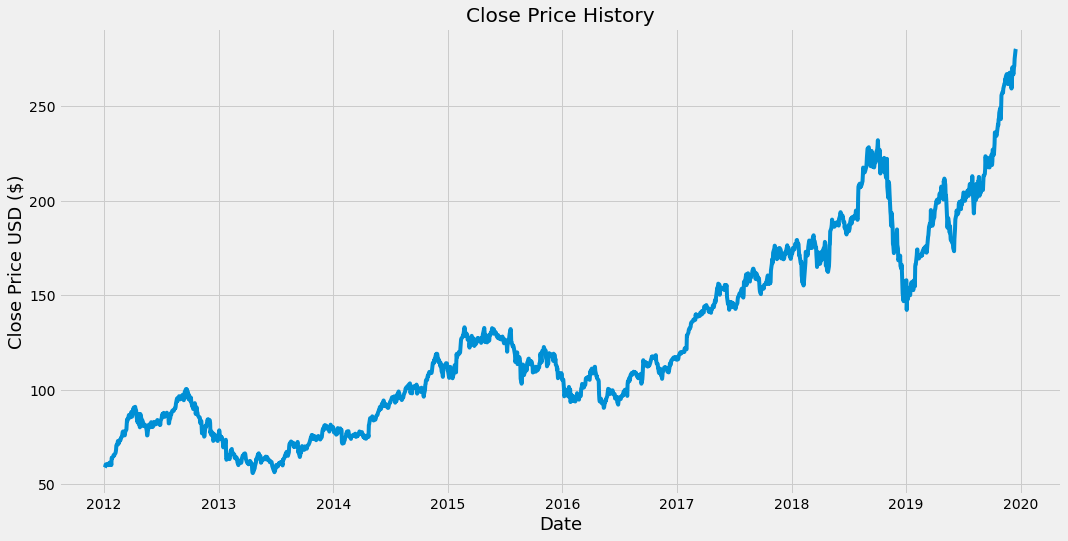

In [10]:
# This code visualizes the closing price history of the chosen stock
plt.figure(figsize=(16,8))
plt.title('Close Price History')
# can be open or close or high or low
plt.plot(df['Close'])
# This defines the x axis
plt.xlabel('Date',fontsize=18)
# This defines the y axis
plt.ylabel('Close Price USD ($)',fontsize=18)
# Exhibits the data by visualizing it
plt.show()

In [ ]:
# Create a new data frame with only the closing price and convert it to an array.
# Then create a variable to store the length of the training data set. 
# I want the training data set to contain about 80% of the data.


#Create a new dataframe with only the 'Close' column
data = df.filter(['Close'])
#Converting the dataframe to a numpy array
dataset = data.values
#Get /Compute the number of rows to train the model on
training_data_len = math.ceil( len(dataset) *.8)

In [ ]:
# Now scale the data set to be values between 0 and 1 inclusive, I do this because it 
# is generally good practice to scale your data before giving it to the neural network.

#Scale the all of the data to be values between 0 and 1 
scaler = MinMaxScaler(feature_range=(0, 1)) 
scaled_data = scaler.fit_transform(dataset)

In [ ]:
# Create a training data set that contains the past 60 day closing price values 
# that we want to use to predict the 61st closing price value.

# So the first column in the ‘x_train’ data set will contain values from the 
# data set from index 0 to index 59 (60 values total) and the second column will 
#contain values from the data set from index 1 to index 60 (60 values) and so on and so forth.

# The ‘y_train’ data set will contain the 61st value located at index 60 for it’s first 
# column and the 62nd value located at index 61 of the data set for it’s second value and so on and so forth.



#Create the scaled training data set 
train_data = scaled_data[0:training_data_len  , : ]
#Split the data into x_train and y_train data sets
x_train=[]
y_train = []
for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])

In [ ]:
# Now convert the independent train data set ‘x_train’ and dependent train 
# data set ‘y_train’ to numpy arrays so they can be used for training the LSTM model.

#Convert x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
# Reshape the data to be 3-dimensional in the form [number of samples, 
# number of time steps, and number of features]. The LSTM model is expecting 
# a 3-dimensional data set.

#Reshape the data into the shape accepted by the LSTM
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

In [ ]:
# Build the LSTM model to have two LSTM layers with 50 neurons and 
# two Dense layers, one with 25 neurons and the other with 1 neuron.

#Build the LSTM network model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))

In [ ]:
# Compile the model using the mean squared error (MSE) loss 
# function and the adam optimizer.

#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
# Train the model using the training data sets. Note, fit is another 
# name for train. Batch size is the total number of training examples 
# present in a single batch, and epoch is the number of iterations when 
# an entire data set is passed forward and backward through the neural 
# network.

#Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

Epoch 1/1
1543/1543 [==============================] - 436s 283ms/step - loss: 8.8372e-04


In [ ]:
#Create a dataset

#Test data set
test_data = scaled_data[training_data_len - 60: , : ]
#Create the x_test and y_test data sets
x_test = []
y_test =  dataset[training_data_len : , : ] #Get all of the rows from index 1603 to the rest and all of the columns (in this case it's only column 'Close'), so 2003 - 1603 = 400 rows of data
for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])

In [ ]:
# Then convert the independent test data set ‘x_test’ to a numpy 
# array so it can be used for testing the LSTM model.

#Convert x_test to a numpy array 
x_test = np.array(x_test)

In [ ]:
# Reshape the data to be 3-dimensional in the form [number of samples, 
# number of time steps, and number of features]. This needs to be done, 
# because the LSTM model is expecting a 3-dimensional data set.

#Reshape the data into the shape accepted by the LSTM
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

In [ ]:
# Now get the predicted values from the model using the test data.

#Getting the models predicted price values
predictions = model.predict(x_test) 
predictions = scaler.inverse_transform(predictions)#Undo scaling

In [ ]:
# Get the root mean squared error (RMSE), which is a good measure of 
# how accurate the model is. A value of 0 would indicate that the 
# models predicted values match the actual values from the test data 
# set perfectly.

# The lower the value the better the model performed. But usually it is 
# best to use other metrics as well to truly get an idea of how well 
# the model performed.

#Calculate/Get the value of RMSE
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
rmse

5.9591752857379445

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


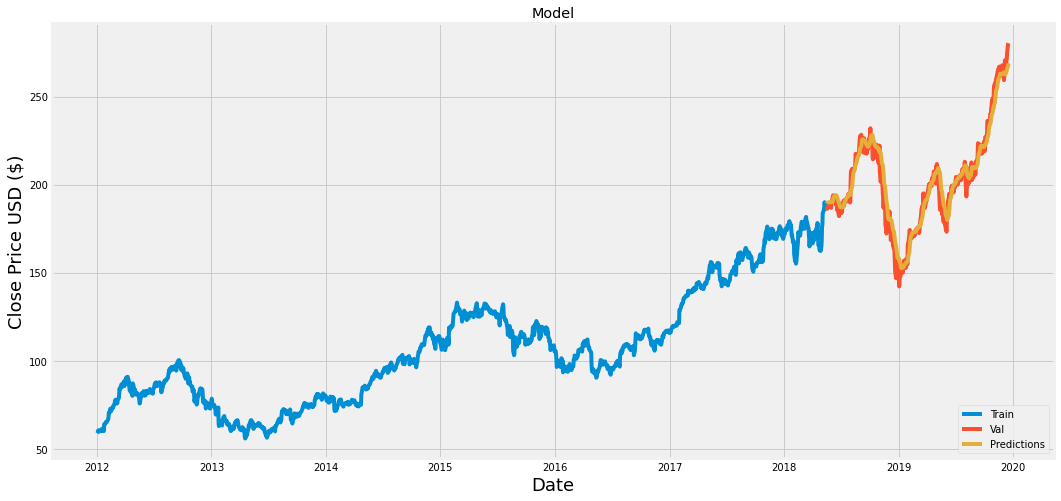

In [ ]:
# Let’s plot and visualize the data.

#Plot/Create the data for the graph
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [ ]:
#Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2018-05-17,186.990005,189.299789
2018-05-18,186.309998,189.762894
2018-05-21,187.630005,189.905563
2018-05-22,187.160004,189.984772
2018-05-23,188.360001,189.959564
...,...,...
2019-12-11,270.769989,264.382690
2019-12-12,271.459991,265.182709
2019-12-13,275.149994,266.061768


In [ ]:
# I want to test the model some more and get the predicted closing price value of Apple Inc. for December 18, 2019 (12/18/2019).
# So I will get the quote, convert the data to an array that contains only the closing price. Then I will get the last 60 day closing price and scale the data to be values between 0 and 1 inclusive.
# After that I will create an empty list and append the past 60 day price to it, and then convert it to a numpy array and reshape it so that I can input the data into the model.
# Last but not least, I will input the data into the model and get the predicted price.


#Get the quote
apple_quote = web.DataReader('AAPL', data_source='yahoo', start='2012-01-01', end='2019-12-17')
#Create a new dataframe
new_df = apple_quote.filter(['Close'])
#Get teh last 60 day closing price 
last_60_days = new_df[-60:].values
#Scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)
#Create an empty list
X_test = []
#Append teh past 60 days
X_test.append(last_60_days_scaled)
#Convert the X_test data set to a numpy array
X_test = np.array(X_test)
#Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
#Get the predicted scaled price
pred_price = model.predict(X_test)
#undo the scaling 
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[270.75302]]


In [ ]:
# Now let’s see what the actual price for that day was.


#Get the quote
apple_quote2 = web.DataReader('AAPL', data_source='yahoo', start='2019-12-18', end='2019-12-18')
print(apple_quote2['Close'])

Date
2019-12-18    279.73999
Name: Close, dtype: float64
